In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

##BASE DE DATOS PARA HABITANTES


In [34]:
url_habitantes='https://raw.githubusercontent.com/SantiRestrepoOlarte/Analitica_Negocios/main/HABITANTESCOMUNA.txt'

dfhabitantes = pd.read_csv(url_habitantes)
dfhabitantes

,NUMERO,COMUNA,HABITANTES,PARTICION
0,1.0,POPULAR,147382,5.64
1,2.0,SANTA CRUZ,120959,4.63
2,3.0,MANRIQUE,177232,6.78
3,4.0,ARANJUEZ,145325,5.56
4,5.0,CASTILLA,126939,4.86
5,6.0,DOCE DE OCTUBRE,183012,7.00
6,7.0,ROBLEDO,204954,7.84
7,8.0,VILLA HERMOSA,168399,6.44
8,9.0,BUENOS AIRES,171416,6.56
9,10.0,LA CANDELARIA,78937,3.02


## BASE DE DATOS HOSPITAL GENERAL DE MEDELLÍN


In [35]:
url_hospital='https://docs.google.com/spreadsheets/d/1YFTKmWaxbfDFaU-wz0BxzynLHu-pR4hU/gviz/tq?tqx=out:csv'

dfhospital = pd.read_csv(url_hospital)
dfhospital

,aÃ±o,periodo_reporte,fecha_atencion,servicio,sexo,codigo_aseguradora,aseguradora,poblacion,Departamento,edad,rango_edad,regimen
0,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Veinte de Julio SAN JAVIER,ANTIOQUIA,2,1 - 4 aNos,REgimen Subsidiado
1,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000362.0,"AXA COLPATRIA SEGUROS SA, SOAT",Barrio Cristobal LA AMERICA,ANTIOQUIA,35,15 - 44 aNos,Otros
2,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000368.0,SEGUROS LA PREVISORA,Playon de Los Comuneros SANTA CRUZ,ANTIOQUIA,24,15 - 44 aNos,Otros
3,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000366.0,SEGUROS DEL ESTADO,Aures No2 ROBLEDO,ANTIOQUIA,23,15 - 44 aNos,Otros
4,2022,1,2022-01-02T00:00:00.000-05:00,Hospitalizado,M,20000368.0,SEGUROS LA PREVISORA,MEDELLIN,ANTIOQUIA,32,15 - 44 aNos,Otros
...,...,...,...,...,...,...,...,...,...,...,...,...
142780,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,MEDELLIN -,ANTIOQUIA,66,> 65 aÃ±os,REgimen Subsidiado
142781,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,SANTO DOMINGO - SANTO DOMINGO,ANTIOQUIA,67,> 65 aÃ±os,REgimen Subsidiado
142782,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20003372.0,"DISPENSARIO MEDICO MEDELLIN, SANIDAD MILITAR",MEDELLIN -,ANTIOQUIA,72,> 65 aÃ±os,REgimen especial
142783,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20000176.0,"COMFACHOCO EPS-S, SUBSIDIADO",BAGADO,CHOCO,85,> 65 aÃ±os,REgimen Subsidiado


# EXPLORACIÓN DE DATOS

In [4]:
dfhospital.info(), dfhabitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142785 entries, 0 to 142784
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   aÃ±o                142785 non-null  int64  
 1   periodo_reporte     142785 non-null  int64  
 2   fecha_atencion      142785 non-null  object 
 3   servicio            142785 non-null  object 
 4   sexo                142785 non-null  object 
 5   codigo_aseguradora  139403 non-null  float64
 6   aseguradora         140494 non-null  object 
 7   poblacion           142785 non-null  object 
 8   Departamento        142785 non-null  object 
 9   edad                142785 non-null  int64  
 10  rango_edad          142785 non-null  object 
 11  regimen             142785 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 13.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column      Non-Nul

(None, None)

In [5]:
dfhospital.isnull().sum(),dfhabitantes.isnull().sum()

(aÃ±o                     0
 periodo_reporte          0
 fecha_atencion           0
 servicio                 0
 sexo                     0
 codigo_aseguradora    3382
 aseguradora           2291
 poblacion                0
 Departamento             0
 edad                     0
 rango_edad               0
 regimen                  0
 dtype: int64,
 NUMERO        1
 COMUNA        1
 HABITANTES    0
 PARTICION     1
 dtype: int64)

In [6]:
dfhospital['poblacion'].nunique(), dfhospital['poblacion'].unique()

(6021,
 array(['Veinte de Julio  SAN JAVIER', 'Barrio Cristobal  LA AMERICA',
        'Playon de Los Comuneros  SANTA CRUZ', ..., 'SEGOVIA',
        'ENVIGADO - MESA', 'BAGADO'], dtype=object))

In [ ]:
dfhospital['servicio'].unique()

array(['Ambulatorio', 'Hospitalizado', 'AMBULATORIO', 'HOSPITALIZADO'],
      dtype=object)

In [ ]:
# Buscar palabra clave en 'poblacion' para identificar como están escritos los nombres de las columnas

df_buscar=dfhospital.copy()

pattern = re.compile(r'SAN ANTONIO DE PRADO', re.IGNORECASE)  # El uso de re.IGNORECASE hace que la búsqueda sea insensible a mayúsculas y minúsculas

# Filtrar el DataFrame
nuevo_df = df_buscar[df_buscar['poblacion'].str.contains(pattern, na=False)]
nuevo_df

,aÃ±o,periodo_reporte,fecha_atencion,servicio,sexo,codigo_aseguradora,aseguradora,poblacion,Departamento,edad,rango_edad,regimen
20,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,F,20000362.0,"AXA COLPATRIA SEGUROS SA, SOAT",MEDELLIN SAN ANTONIO DE PRADO,ANTIOQUIA,33,15 - 44 aNos,Otros
74,2022,1,2022-01-03T00:00:00.000-05:00,Ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,MEDELLIN SAN ANTONIO DE PRADO,ANTIOQUIA,27,15 - 44 aNos,REgimen Subsidiado
111,2022,1,2022-01-03T00:00:00.000-05:00,Ambulatorio,F,20002569.0,DIRECCION GENERAL DE SANIDAD MI,MEDELLIN SAN ANTONIO DE PRADO,ANTIOQUIA,40,15 - 44 aNos,Otros
249,2022,1,2022-01-03T00:00:00.000-05:00,Ambulatorio,F,20002687.0,ALIANZA MED - ANT EPS SAS - CON CONTRIBUTIVO I...,MEDELLIN SAN ANTONIO DE PRADO,ANTIOQUIA,25,15 - 44 aNos,REgimen Contributivo
255,2022,1,2022-01-03T00:00:00.000-05:00,Ambulatorio,F,20000366.0,SEGUROS DEL ESTADO,MEDELLIN SAN ANTONIO DE PRADO,ANTIOQUIA,35,15 - 44 aNos,Otros
...,...,...,...,...,...,...,...,...,...,...,...,...
142601,2023,2,2023-06-06T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,MEDELLIN SAN ANTONIO DE PRADO,ANTIOQUIA,74,> 65 aÃ±os,REgimen Subsidiado
142632,2023,2,2023-06-06T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,MEDELLIN SAN ANTONIO DE PRADO,ANTIOQUIA,74,> 65 aÃ±os,REgimen Subsidiado
142685,2023,2,2023-06-05T00:00:00.000-05:00,Ambulatorio,F,20003402.0,UNION TEMPORAL RUTA AUTOINMUNES UTA,MEDELLIN - SAN ANTONIO DE PRADO,ANTIOQUIA,74,> 65 aÃ±os,REgimen especial
142701,2023,2,2023-06-05T00:00:00.000-05:00,Ambulatorio,F,20003402.0,UNION TEMPORAL RUTA AUTOINMUNES UTA,MEDELLIN - SAN ANTONIO DE PRADO,ANTIOQUIA,74,> 65 aÃ±os,REgimen especial


# FILTRADO DE DATAFRAMES (incluye redefinición y categorización)

Solo se hará uso de las observaciones pertenecientes a Antioquia, más precisamente solo de Medellín para poder realizar la relación con el dataframe de habitantes por comuna

In [7]:
dfhospital

,aÃ±o,periodo_reporte,fecha_atencion,servicio,sexo,codigo_aseguradora,aseguradora,poblacion,Departamento,edad,rango_edad,regimen
0,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Veinte de Julio SAN JAVIER,ANTIOQUIA,2,1 - 4 aNos,REgimen Subsidiado
1,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000362.0,"AXA COLPATRIA SEGUROS SA, SOAT",Barrio Cristobal LA AMERICA,ANTIOQUIA,35,15 - 44 aNos,Otros
2,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000368.0,SEGUROS LA PREVISORA,Playon de Los Comuneros SANTA CRUZ,ANTIOQUIA,24,15 - 44 aNos,Otros
3,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000366.0,SEGUROS DEL ESTADO,Aures No2 ROBLEDO,ANTIOQUIA,23,15 - 44 aNos,Otros
4,2022,1,2022-01-02T00:00:00.000-05:00,Hospitalizado,M,20000368.0,SEGUROS LA PREVISORA,MEDELLIN,ANTIOQUIA,32,15 - 44 aNos,Otros
...,...,...,...,...,...,...,...,...,...,...,...,...
142780,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,MEDELLIN -,ANTIOQUIA,66,> 65 aÃ±os,REgimen Subsidiado
142781,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,SANTO DOMINGO - SANTO DOMINGO,ANTIOQUIA,67,> 65 aÃ±os,REgimen Subsidiado
142782,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20003372.0,"DISPENSARIO MEDICO MEDELLIN, SANIDAD MILITAR",MEDELLIN -,ANTIOQUIA,72,> 65 aÃ±os,REgimen especial
142783,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20000176.0,"COMFACHOCO EPS-S, SUBSIDIADO",BAGADO,CHOCO,85,> 65 aÃ±os,REgimen Subsidiado


In [38]:
# Separacion de barrio y comuna del dataframe 'dfhospital'

# Utilizar una expresión regular para extraer las palabras en mayúsculas
dfhospital['poblacion'] = dfhospital['poblacion'].astype(str)
dfhospital['COMUNA'] = dfhospital['poblacion'].apply(lambda x: ' '.join(re.findall(r'\b[A-Z]+\b', x)[:]))
dfhospital['poblacion'] = dfhospital['poblacion'].apply(lambda x: ' '.join([word for word in x.split() if not word.isupper()]))


# Mostrar el DataFrame resultante
dfhospital

,aÃ±o,periodo_reporte,fecha_atencion,servicio,sexo,codigo_aseguradora,aseguradora,poblacion,Departamento,edad,rango_edad,regimen,COMUNA
0,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Veinte de Julio,ANTIOQUIA,2,1 - 4 aNos,REgimen Subsidiado,SAN JAVIER
1,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000362.0,"AXA COLPATRIA SEGUROS SA, SOAT",Barrio Cristobal,ANTIOQUIA,35,15 - 44 aNos,Otros,LA AMERICA
2,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000368.0,SEGUROS LA PREVISORA,Playon de Los Comuneros,ANTIOQUIA,24,15 - 44 aNos,Otros,SANTA CRUZ
3,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000366.0,SEGUROS DEL ESTADO,Aures No2,ANTIOQUIA,23,15 - 44 aNos,Otros,ROBLEDO
4,2022,1,2022-01-02T00:00:00.000-05:00,Hospitalizado,M,20000368.0,SEGUROS LA PREVISORA,,ANTIOQUIA,32,15 - 44 aNos,Otros,MEDELLIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142780,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,-,ANTIOQUIA,66,> 65 aÃ±os,REgimen Subsidiado,MEDELLIN
142781,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,-,ANTIOQUIA,67,> 65 aÃ±os,REgimen Subsidiado,SANTO DOMINGO SANTO DOMINGO
142782,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20003372.0,"DISPENSARIO MEDICO MEDELLIN, SANIDAD MILITAR",-,ANTIOQUIA,72,> 65 aÃ±os,REgimen especial,MEDELLIN
142783,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20000176.0,"COMFACHOCO EPS-S, SUBSIDIADO",,CHOCO,85,> 65 aÃ±os,REgimen Subsidiado,BAGADO


In [39]:
# Filtrar solo por observaciones pertenecientes a comunas de Medellin

df_hosp_filt=dfhospital.copy()

comunas = [
    'POPULAR', 'SANTA CRUZ', 'MANRIQUE', 'ARANJUEZ', 'CASTILLA', 'DOCE DE OCTUBRE', 'ROBLEDO',
    'VILLA HERMOSA', 'BUENOS AIRES', 'LA CANDELARIA', 'LAURELES-ESTADIO', 'LAURELES',
    'LA AMERICA', 'SAN JAVIER', 'EL POBLADO', 'GUAYABAL', 'BELEN',
    'MEDELLIN SAN SEBASTIAN DE PALMITAS', 'MEDELLIN - SAN SEBASTIAN DE PALMITAS',
    'MEDELLIN - SAN SEBASTIAN DE PALMITAS', 'MEDELLIN SAN CRISTOBAL',
    'MEDELLIN - SAN CRISTOBAL', 'MEDELLIN ALTAVISTA', 'MEDELLIN - ALTAVISTA',
    'MEDELLIN SAN ANTONIO DE PRADO', 'MEDELLIN - SAN ANTONIO DE PRADO',
    'MEDELLIN SANTA ELENA', 'MEDELLIN - SANTA ELENA'
]

# Crear una expresión regular para buscar las comunas en 'COMUNA' (insensible a mayúsculas y con espacios opcionales)
pattern = '|'.join(f'(?i){re.escape(comuna)}' for comuna in comunas)
regex = re.compile(pattern)

# Filtrar el DataFrame
df_hosp_filt = dfhospital[dfhospital['COMUNA'].str.contains(regex, na=False)]

# Limpieza y reemplazo en la columna 'COMUNA'
def limpiar_comuna(comuna):
    for c in comunas:
        if re.search(f'(?i){re.escape(c)}', comuna):
            return c
    return None

df_hosp_filt['COMUNA'] = df_hosp_filt['COMUNA'].apply(limpiar_comuna)

# Elimina filas con 'COMUNA' igual a None (corresponden a valores no encontrados en la lista 'comunas')
df_hosp_filt = df_hosp_filt.dropna(subset=['COMUNA'])

df_hosp_filt

<ipython-input-39-ef82b4b25da6>:18: DeprecationWarning: Flags not at the start of the expression '(?i)POPULAR|(?i)SANT' (truncated) but at position 12
  regex = re.compile(pattern)
<ipython-input-39-ef82b4b25da6>:18: DeprecationWarning: Flags not at the start of the expression '(?i)POPULAR|(?i)SANT' (truncated) but at position 28
  regex = re.compile(pattern)
<ipython-input-39-ef82b4b25da6>:18: DeprecationWarning: Flags not at the start of the expression '(?i)POPULAR|(?i)SANT' (truncated) but at position 41
  regex = re.compile(pattern)
<ipython-input-39-ef82b4b25da6>:18: DeprecationWarning: Flags not at the start of the expression '(?i)POPULAR|(?i)SANT' (truncated) but at position 54
  regex = re.compile(pattern)
<ipython-input-39-ef82b4b25da6>:18: DeprecationWarning: Flags not at the start of the expression '(?i)POPULAR|(?i)SANT' (truncated) but at position 67
  regex = re.compile(pattern)
<ipython-input-39-ef82b4b25da6>:18: DeprecationWarning: Flags not at the start of the expressio

,aÃ±o,periodo_reporte,fecha_atencion,servicio,sexo,codigo_aseguradora,aseguradora,poblacion,Departamento,edad,rango_edad,regimen,COMUNA
0,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Veinte de Julio,ANTIOQUIA,2,1 - 4 aNos,REgimen Subsidiado,SAN JAVIER
1,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000362.0,"AXA COLPATRIA SEGUROS SA, SOAT",Barrio Cristobal,ANTIOQUIA,35,15 - 44 aNos,Otros,LA AMERICA
2,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000368.0,SEGUROS LA PREVISORA,Playon de Los Comuneros,ANTIOQUIA,24,15 - 44 aNos,Otros,SANTA CRUZ
3,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000366.0,SEGUROS DEL ESTADO,Aures No2,ANTIOQUIA,23,15 - 44 aNos,Otros,ROBLEDO
7,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,F,20002569.0,DIRECCION GENERAL DE SANIDAD MI,Buenos Aires,ANTIOQUIA,31,15 - 44 aNos,Otros,BUENOS AIRES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142759,2023,2,2023-06-02T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,-,ANTIOQUIA,70,> 65 aÃ±os,REgimen Subsidiado,MEDELLIN SAN ANTONIO DE PRADO
142761,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Guayabal -,ANTIOQUIA,95,> 65 aÃ±os,REgimen Subsidiado,GUAYABAL
142762,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Santo Domingo Savio No.1 -,ANTIOQUIA,68,> 65 aÃ±os,REgimen Subsidiado,POPULAR
142764,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,El Pesebre -,ANTIOQUIA,69,> 65 aÃ±os,REgimen Subsidiado,SAN JAVIER


In [10]:
# 'COMUNA' si posee las 21 comunas

df_hosp_filt['COMUNA'].nunique(),df_hosp_filt['COMUNA'].unique()

(21,
 array(['SAN JAVIER', 'LA AMERICA', 'SANTA CRUZ', 'ROBLEDO',
        'BUENOS AIRES', 'MANRIQUE', 'POPULAR', 'BELEN',
        'MEDELLIN SAN ANTONIO DE PRADO', 'VILLA HERMOSA', 'LAURELES',
        'GUAYABAL', 'MEDELLIN ALTAVISTA', 'MEDELLIN SANTA ELENA',
        'ARANJUEZ', 'EL POBLADO', 'MEDELLIN SAN CRISTOBAL',
        'DOCE DE OCTUBRE', 'LA CANDELARIA', 'CASTILLA',
        'MEDELLIN SAN SEBASTIAN DE PALMITAS'], dtype=object))

In [40]:
# Eliminación de la palabra 'MEDELLIN' en los corregimientos

df_hosp_filt['COMUNA'] = df_hosp_filt['COMUNA'].replace('MEDELLIN SAN ANTONIO DE PRADO', 'SAN ANTONIO DE PRADO', regex=True)
df_hosp_filt['COMUNA'] = df_hosp_filt['COMUNA'].replace('MEDELLIN SAN SEBASTIAN DE PALMITAS', 'SAN SEBASTIAN DE PALMITAS', regex=True)
df_hosp_filt['COMUNA'] = df_hosp_filt['COMUNA'].replace('MEDELLIN ALTAVISTA', 'ALTAVISTA', regex=True)
df_hosp_filt['COMUNA'] = df_hosp_filt['COMUNA'].replace('MEDELLIN SANTA ELENA', 'SANTA ELENA', regex=True)
df_hosp_filt['COMUNA'] = df_hosp_filt['COMUNA'].replace('MEDELLIN SAN CRISTOBAL', 'SAN CRISTOBAL', regex=True)

df_hosp_filt

,aÃ±o,periodo_reporte,fecha_atencion,servicio,sexo,codigo_aseguradora,aseguradora,poblacion,Departamento,edad,rango_edad,regimen,COMUNA
0,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Veinte de Julio,ANTIOQUIA,2,1 - 4 aNos,REgimen Subsidiado,SAN JAVIER
1,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000362.0,"AXA COLPATRIA SEGUROS SA, SOAT",Barrio Cristobal,ANTIOQUIA,35,15 - 44 aNos,Otros,LA AMERICA
2,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000368.0,SEGUROS LA PREVISORA,Playon de Los Comuneros,ANTIOQUIA,24,15 - 44 aNos,Otros,SANTA CRUZ
3,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000366.0,SEGUROS DEL ESTADO,Aures No2,ANTIOQUIA,23,15 - 44 aNos,Otros,ROBLEDO
7,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,F,20002569.0,DIRECCION GENERAL DE SANIDAD MI,Buenos Aires,ANTIOQUIA,31,15 - 44 aNos,Otros,BUENOS AIRES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142759,2023,2,2023-06-02T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,-,ANTIOQUIA,70,> 65 aÃ±os,REgimen Subsidiado,SAN ANTONIO DE PRADO
142761,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Guayabal -,ANTIOQUIA,95,> 65 aÃ±os,REgimen Subsidiado,GUAYABAL
142762,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Santo Domingo Savio No.1 -,ANTIOQUIA,68,> 65 aÃ±os,REgimen Subsidiado,POPULAR
142764,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,El Pesebre -,ANTIOQUIA,69,> 65 aÃ±os,REgimen Subsidiado,SAN JAVIER


In [ ]:
df_hosp_filt['COMUNA'].nunique(),df_hosp_filt['COMUNA'].unique()

(21,
 array(['SAN JAVIER', 'LA AMERICA', 'SANTA CRUZ', 'ROBLEDO',
        'BUENOS AIRES', 'MANRIQUE', 'POPULAR', 'BELEN',
        'SAN ANTONIO DE PRADO', 'VILLA HERMOSA', 'LAURELES', 'GUAYABAL',
        'ALTAVISTA', 'SANTA ELENA', 'ARANJUEZ', 'EL POBLADO',
        'SAN CRISTOBAL', 'DOCE DE OCTUBRE', 'LA CANDELARIA', 'CASTILLA',
        'SAN SEBASTIAN DE PALMITAS'], dtype=object))

In [41]:
# Reemplazar '-' en 'población' por el nombre del corregimiento dado que queda '-' porque no hay nombre del barrio

def reemplazar_poblacion(row):
    if row['poblacion'] == '-':
        return row['COMUNA'].lower()
    return row['poblacion'].capitalize()

# Aplica la función a la columna 'poblacion'
df_hosp_filt['poblacion'] = df_hosp_filt.apply(reemplazar_poblacion, axis=1)
df_hosp_filt

,aÃ±o,periodo_reporte,fecha_atencion,servicio,sexo,codigo_aseguradora,aseguradora,poblacion,Departamento,edad,rango_edad,regimen,COMUNA
0,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Veinte de julio,ANTIOQUIA,2,1 - 4 aNos,REgimen Subsidiado,SAN JAVIER
1,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000362.0,"AXA COLPATRIA SEGUROS SA, SOAT",Barrio cristobal,ANTIOQUIA,35,15 - 44 aNos,Otros,LA AMERICA
2,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000368.0,SEGUROS LA PREVISORA,Playon de los comuneros,ANTIOQUIA,24,15 - 44 aNos,Otros,SANTA CRUZ
3,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000366.0,SEGUROS DEL ESTADO,Aures no2,ANTIOQUIA,23,15 - 44 aNos,Otros,ROBLEDO
7,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,F,20002569.0,DIRECCION GENERAL DE SANIDAD MI,Buenos aires,ANTIOQUIA,31,15 - 44 aNos,Otros,BUENOS AIRES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142759,2023,2,2023-06-02T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,san antonio de prado,ANTIOQUIA,70,> 65 aÃ±os,REgimen Subsidiado,SAN ANTONIO DE PRADO
142761,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Guayabal -,ANTIOQUIA,95,> 65 aÃ±os,REgimen Subsidiado,GUAYABAL
142762,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Santo domingo savio no.1 -,ANTIOQUIA,68,> 65 aÃ±os,REgimen Subsidiado,POPULAR
142764,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,El pesebre -,ANTIOQUIA,69,> 65 aÃ±os,REgimen Subsidiado,SAN JAVIER


In [42]:
# Quitar el '-' de los barrios resultantes

df_hosp_filt['poblacion'] = df_hosp_filt['poblacion'].str.replace('-', '')
df_hosp_filt

,aÃ±o,periodo_reporte,fecha_atencion,servicio,sexo,codigo_aseguradora,aseguradora,poblacion,Departamento,edad,rango_edad,regimen,COMUNA
0,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Veinte de julio,ANTIOQUIA,2,1 - 4 aNos,REgimen Subsidiado,SAN JAVIER
1,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000362.0,"AXA COLPATRIA SEGUROS SA, SOAT",Barrio cristobal,ANTIOQUIA,35,15 - 44 aNos,Otros,LA AMERICA
2,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000368.0,SEGUROS LA PREVISORA,Playon de los comuneros,ANTIOQUIA,24,15 - 44 aNos,Otros,SANTA CRUZ
3,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000366.0,SEGUROS DEL ESTADO,Aures no2,ANTIOQUIA,23,15 - 44 aNos,Otros,ROBLEDO
7,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,F,20002569.0,DIRECCION GENERAL DE SANIDAD MI,Buenos aires,ANTIOQUIA,31,15 - 44 aNos,Otros,BUENOS AIRES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142759,2023,2,2023-06-02T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,san antonio de prado,ANTIOQUIA,70,> 65 aÃ±os,REgimen Subsidiado,SAN ANTONIO DE PRADO
142761,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Guayabal,ANTIOQUIA,95,> 65 aÃ±os,REgimen Subsidiado,GUAYABAL
142762,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Santo domingo savio no.1,ANTIOQUIA,68,> 65 aÃ±os,REgimen Subsidiado,POPULAR
142764,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,El pesebre,ANTIOQUIA,69,> 65 aÃ±os,REgimen Subsidiado,SAN JAVIER


In [ ]:
df_hosp_filt['poblacion'].unique()

In [14]:
# Eliminar observaciones con valores incorrectos en 'poblacion'

valores_a_eliminar = ['', '1','2','La','loma','Cam','po Valdes No2','23','MedellIn','#1','# 1','# 2','- 2','-2','- 1','-1','- ALiadas','nizal','-']

df_hosp_filt = df_hosp_filt[~df_hosp_filt['poblacion'].isin(valores_a_eliminar)]

df_hosp_filt

,aÃ±o,periodo_reporte,fecha_atencion,servicio,sexo,codigo_aseguradora,aseguradora,poblacion,Departamento,edad,rango_edad,regimen,COMUNA
0,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Veinte de julio,ANTIOQUIA,2,1 - 4 aNos,REgimen Subsidiado,SAN JAVIER
1,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000362.0,"AXA COLPATRIA SEGUROS SA, SOAT",Barrio cristobal,ANTIOQUIA,35,15 - 44 aNos,Otros,LA AMERICA
2,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000368.0,SEGUROS LA PREVISORA,Playon de los comuneros,ANTIOQUIA,24,15 - 44 aNos,Otros,SANTA CRUZ
3,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,M,20000366.0,SEGUROS DEL ESTADO,Aures no2,ANTIOQUIA,23,15 - 44 aNos,Otros,ROBLEDO
7,2022,1,2022-01-02T00:00:00.000-05:00,Ambulatorio,F,20002569.0,DIRECCION GENERAL DE SANIDAD MI,Buenos aires,ANTIOQUIA,31,15 - 44 aNos,Otros,BUENOS AIRES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142759,2023,2,2023-06-02T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,san antonio de prado,ANTIOQUIA,70,> 65 aÃ±os,REgimen Subsidiado,SAN ANTONIO DE PRADO
142761,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Guayabal,ANTIOQUIA,95,> 65 aÃ±os,REgimen Subsidiado,GUAYABAL
142762,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Santo domingo savio no.1,ANTIOQUIA,68,> 65 aÃ±os,REgimen Subsidiado,POPULAR
142764,2023,2,2023-06-01T00:00:00.000-05:00,Ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,El pesebre,ANTIOQUIA,69,> 65 aÃ±os,REgimen Subsidiado,SAN JAVIER


In [ ]:
df_hosp_filt['poblacion'].unique()

In [ ]:
df_hosp_filt['COMUNA'].value_counts()

In [ ]:
df_hosp_filt.isnull().sum()

In [ ]:
df_hosp_filt[df_hosp_filt['poblacion']=='La milagrosa']

In [ ]:
dfhospital['servicio'].unique()

In [ ]:
# Poner toda la columna 'servicio' en el mismo formato

df_hosp_filt['servicio'] = df_hosp_filt['servicio'].str.lower()
df_hosp_filt['servicio'] = df_hosp_filt['servicio'].replace({'HOSPITALIZADO': 'Hospitalizado', 'AMBULATORIO': 'Ambulatorio'})

df_hosp_filt

In [ ]:
df_hosp_filt['servicio'].unique()

In [ ]:
df_hosp_filt['regimen'].unique()

In [44]:
# Redefición de 'regimen'
df_hosp_filt['regimen'] = df_hosp_filt['regimen'].str.upper()

In [ ]:
df_hosp_filt['regimen'].unique()

array(['REGIMEN SUBSIDIADO', 'OTROS', 'VINCULADOS',
       'REGIMEN CONTRIBUTIVO', 'PARTICULARES', 'REGIMEN ESPECIAL',
       'RIESGOS PROFESIONAL.', 'HGM 50% DESCUENTO FUNCIONARIOS'],
      dtype=object)

In [ ]:
df_hosp_filt

In [ ]:
dfhospital['rango_edad'].unique()

In [45]:
# Eliminar 'rango_edad' y reemplazarla por 'etapa_vida'
df_hosp_filt['rango_edad'] = np.nan

# Categorizar la edad
df_hosp_filt.loc[(df_hosp_filt['edad'] >= 0) & (df_hosp_filt['edad'] <= 5), 'rango_edad'] = 'Primera Infancia'
df_hosp_filt.loc[(df_hosp_filt['edad'] >= 6) & (df_hosp_filt['edad'] <= 11), 'rango_edad'] = 'Infancia'
df_hosp_filt.loc[(df_hosp_filt['edad'] >= 12) & (df_hosp_filt['edad'] <= 18), 'rango_edad'] = 'Adolescencia'
df_hosp_filt.loc[(df_hosp_filt['edad'] >= 19) & (df_hosp_filt['edad'] <= 26), 'rango_edad'] = 'Juventud'
df_hosp_filt.loc[(df_hosp_filt['edad'] >= 27) & (df_hosp_filt['edad'] <= 59), 'rango_edad'] = 'Adultez'
df_hosp_filt.loc[(df_hosp_filt['edad']>=60), 'rango_edad'] = 'Persona Mayor'

# Renombrar la columna
df_hosp_filt = df_hosp_filt.rename(columns={'rango_edad': 'etapa_vida'})

In [ ]:
df_hosp_filt['etapa_vida'].unique()

array(['Primera Infancia', 'Adultez', 'Juventud', 'Adolescencia',
       'Persona Mayor', 'Infancia'], dtype=object)

In [46]:
# Renombrar la columna 'año'
df_hosp_filt = df_hosp_filt.rename(columns={'aÃ±o': 'año'})

# UNIÓN DE DATAFRAMES

In [ ]:
# Se realiza la unión por la columna ' COMUNA'

df_merged = df_hosp_filt.merge(dfhabitantes, on='COMUNA', how='left')
df_merged

In [20]:
# Se comprueba que sigan estando las 21 comunas
df_merged['COMUNA'].nunique(),df_merged['COMUNA'].unique()

(21,
 array(['SAN JAVIER', 'LA AMERICA', 'SANTA CRUZ', 'ROBLEDO',
        'BUENOS AIRES', 'MANRIQUE', 'POPULAR', 'BELEN', 'VILLA HERMOSA',
        'LAURELES', 'GUAYABAL', 'ARANJUEZ', 'DOCE DE OCTUBRE',
        'LA CANDELARIA', 'EL POBLADO', 'CASTILLA', 'SAN ANTONIO DE PRADO',
        'SAN CRISTOBAL', 'SANTA ELENA', 'ALTAVISTA',
        'SAN SEBASTIAN DE PALMITAS'], dtype=object))

In [ ]:
df_merged.isnull().sum()

año                     0
periodo_reporte         0
fecha_atencion          0
servicio                0
sexo                    0
codigo_aseguradora    868
aseguradora           534
poblacion               0
Departamento            0
edad                    0
etapa_vida              0
regimen                 0
COMUNA                  0
NUMERO                  0
HABITANTES              0
PARTICION               0
dtype: int64

# DATOS FALTANTES

In [48]:
# Filtrar por observaciones qu etengan 'aseguradora' como dato faltante
df_fal_cod=df_merged[df_merged['aseguradora'].isna()]
df_fal_cod

,año,periodo_reporte,fecha_atencion,servicio,sexo,codigo_aseguradora,aseguradora,poblacion,Departamento,edad,etapa_vida,regimen,COMUNA,NUMERO,HABITANTES,PARTICION
44,2022,1,2022-01-03T00:00:00.000-05:00,ambulatorio,F,NaN,NaN,Andalucia,ANTIOQUIA,33,Adultez,PARTICULARES,SANTA CRUZ,2.0,120959,4.63
47,2022,1,2022-01-03T00:00:00.000-05:00,ambulatorio,F,NaN,NaN,,ANTIOQUIA,28,Adultez,PARTICULARES,LA AMERICA,12.0,87849,3.36
48,2022,1,2022-01-03T00:00:00.000-05:00,ambulatorio,F,NaN,NaN,,ANTIOQUIA,26,Juventud,PARTICULARES,LA AMERICA,12.0,87849,3.36
50,2022,1,2022-01-03T00:00:00.000-05:00,ambulatorio,F,NaN,NaN,,ANTIOQUIA,37,Adultez,PARTICULARES,EL POBLADO,14.0,111343,4.26
178,2022,1,2022-01-04T00:00:00.000-05:00,ambulatorio,F,NaN,NaN,Santo domingo savio no1,ANTIOQUIA,42,Adultez,PARTICULARES,POPULAR,1.0,147382,5.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33780,2022,4,2022-12-28T00:00:00.000-05:00,ambulatorio,F,NaN,NaN,Guayabal,ANTIOQUIA,53,Adultez,PARTICULARES,GUAYABAL,15.0,64856,2.48
33857,2022,4,2022-12-28T00:00:00.000-05:00,hospitalizado,M,NaN,NaN,,ANTIOQUIA,19,Juventud,PARTICULARES,EL POBLADO,14.0,111343,4.26
33899,2022,4,2022-12-29T00:00:00.000-05:00,ambulatorio,M,NaN,NaN,Robledo,ANTIOQUIA,45,Adultez,PARTICULARES,ROBLEDO,7.0,204954,7.84
34028,2022,4,2022-12-29T00:00:00.000-05:00,ambulatorio,M,NaN,NaN,El diamante,ANTIOQUIA,27,Adultez,PARTICULARES,ROBLEDO,7.0,204954,7.84


In [49]:
# Se identifica que los pacientes con regimen 'PARTICULARES' son los que tienen datos faltantes en 'aseguradora'
df_part=df_merged[df_merged['regimen']=='PARTICULARES']
df_part

,año,periodo_reporte,fecha_atencion,servicio,sexo,codigo_aseguradora,aseguradora,poblacion,Departamento,edad,etapa_vida,regimen,COMUNA,NUMERO,HABITANTES,PARTICION
44,2022,1,2022-01-03T00:00:00.000-05:00,ambulatorio,F,NaN,NaN,Andalucia,ANTIOQUIA,33,Adultez,PARTICULARES,SANTA CRUZ,2.0,120959,4.63
47,2022,1,2022-01-03T00:00:00.000-05:00,ambulatorio,F,NaN,NaN,,ANTIOQUIA,28,Adultez,PARTICULARES,LA AMERICA,12.0,87849,3.36
48,2022,1,2022-01-03T00:00:00.000-05:00,ambulatorio,F,NaN,NaN,,ANTIOQUIA,26,Juventud,PARTICULARES,LA AMERICA,12.0,87849,3.36
50,2022,1,2022-01-03T00:00:00.000-05:00,ambulatorio,F,NaN,NaN,,ANTIOQUIA,37,Adultez,PARTICULARES,EL POBLADO,14.0,111343,4.26
178,2022,1,2022-01-04T00:00:00.000-05:00,ambulatorio,F,NaN,NaN,Santo domingo savio no1,ANTIOQUIA,42,Adultez,PARTICULARES,POPULAR,1.0,147382,5.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51449,2023,2,2023-06-26T00:00:00.000-05:00,ambulatorio,F,NaN,SIN INFORMACION,La castellana,ANTIOQUIA,82,Persona Mayor,PARTICULARES,LAURELES,11.0,101632,3.89
51477,2023,2,2023-06-22T00:00:00.000-05:00,ambulatorio,F,NaN,SIN INFORMACION,El pesebre,ANTIOQUIA,79,Persona Mayor,PARTICULARES,SAN JAVIER,13.0,171854,6.58
51506,2023,2,2023-06-21T00:00:00.000-05:00,ambulatorio,F,NaN,SIN INFORMACION,Trece de noviembre,ANTIOQUIA,66,Persona Mayor,PARTICULARES,VILLA HERMOSA,8.0,168399,6.44
51566,2023,2,2023-06-15T00:00:00.000-05:00,ambulatorio,F,NaN,SIN INFORMACION,La castellana,ANTIOQUIA,66,Persona Mayor,PARTICULARES,LAURELES,11.0,101632,3.89


In [ ]:
df_part['regimen'].unique(),df_part['aseguradora'].unique()

(array(['PARTICULARES'], dtype=object),
 array([nan, 'SIN INFORMACION'], dtype=object))

In [50]:
# Reemplazar los 'SIN INFORMACION' de la columna 'aseguradora' por np.nan

df_merged['aseguradora'].replace('SIN INFORMACION', np.nan, inplace=True)
df_merged.isnull().sum()

año                      0
periodo_reporte          0
fecha_atencion           0
servicio                 0
sexo                     0
codigo_aseguradora    1011
aseguradora           1011
poblacion                0
Departamento             0
edad                     0
etapa_vida               0
regimen                  0
COMUNA                   0
NUMERO                   0
HABITANTES               0
PARTICION                0
dtype: int64

In [51]:
# Reemplazar los nulos de 'codigo_aseguradora' y 'aseguradora' por 'No registra'

df_merged['codigo_aseguradora'].replace(np.nan, 'No registra',inplace=True)
df_merged['aseguradora'].replace(np.nan, 'No registra', inplace=True)
df_merged.isnull().sum()

año                   0
periodo_reporte       0
fecha_atencion        0
servicio              0
sexo                  0
codigo_aseguradora    0
aseguradora           0
poblacion             0
Departamento          0
edad                  0
etapa_vida            0
regimen               0
COMUNA                0
NUMERO                0
HABITANTES            0
PARTICION             0
dtype: int64

In [52]:
# Pasar fecha a formato datetime (sin la hora)

df_merged['fecha_atencion'] = df_merged['fecha_atencion'].apply(lambda x: pd.to_datetime(x).date())
df_merged

,año,periodo_reporte,fecha_atencion,servicio,sexo,codigo_aseguradora,aseguradora,poblacion,Departamento,edad,etapa_vida,regimen,COMUNA,NUMERO,HABITANTES,PARTICION
0,2022,1,2022-01-02,ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Veinte de julio,ANTIOQUIA,2,Primera Infancia,REGIMEN SUBSIDIADO,SAN JAVIER,13.0,171854,6.58
1,2022,1,2022-01-02,ambulatorio,M,20000362.0,"AXA COLPATRIA SEGUROS SA, SOAT",Barrio cristobal,ANTIOQUIA,35,Adultez,OTROS,LA AMERICA,12.0,87849,3.36
2,2022,1,2022-01-02,ambulatorio,M,20000368.0,SEGUROS LA PREVISORA,Playon de los comuneros,ANTIOQUIA,24,Juventud,OTROS,SANTA CRUZ,2.0,120959,4.63
3,2022,1,2022-01-02,ambulatorio,M,20000366.0,SEGUROS DEL ESTADO,Aures no2,ANTIOQUIA,23,Juventud,OTROS,ROBLEDO,7.0,204954,7.84
4,2022,1,2022-01-02,ambulatorio,F,20002569.0,DIRECCION GENERAL DE SANIDAD MI,Buenos aires,ANTIOQUIA,31,Adultez,OTROS,BUENOS AIRES,9.0,171416,6.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51773,2023,2,2023-06-02,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,san antonio de prado,ANTIOQUIA,70,Persona Mayor,REGIMEN SUBSIDIADO,SAN ANTONIO DE PRADO,80.0,112336,4.30
51774,2023,2,2023-06-01,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Guayabal,ANTIOQUIA,95,Persona Mayor,REGIMEN SUBSIDIADO,GUAYABAL,15.0,64856,2.48
51775,2023,2,2023-06-01,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Santo domingo savio no.1,ANTIOQUIA,68,Persona Mayor,REGIMEN SUBSIDIADO,POPULAR,1.0,147382,5.64
51776,2023,2,2023-06-01,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,El pesebre,ANTIOQUIA,69,Persona Mayor,REGIMEN SUBSIDIADO,SAN JAVIER,13.0,171854,6.58


# OUTLIERS

No existe evidencia de datos outliers

In [ ]:
df_merged['edad'].describe(),df_merged['HABITANTES'].describe()

(count    46160.000000
 mean        40.115836
 std         24.452639
 min          0.000000
 25%         22.000000
 50%         37.000000
 75%         61.000000
 max        104.000000
 Name: edad, dtype: float64,
 count     46160.000000
 mean     166709.160225
 std       33840.020154
 min        6281.000000
 25%      147382.000000
 50%      171416.000000
 75%      183012.000000
 max      214967.000000
 Name: HABITANTES, dtype: float64)

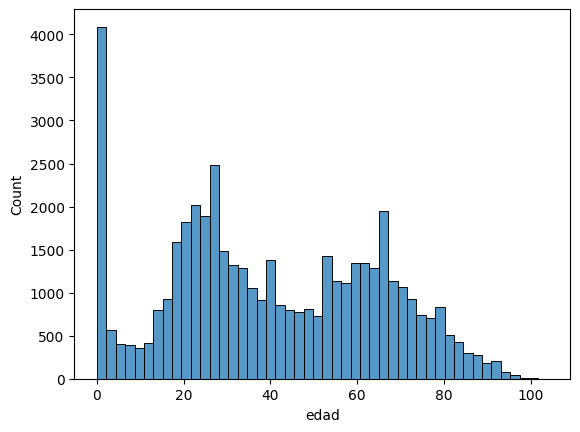

In [ ]:
fig = sns.histplot(data = df_merged, x = 'edad')

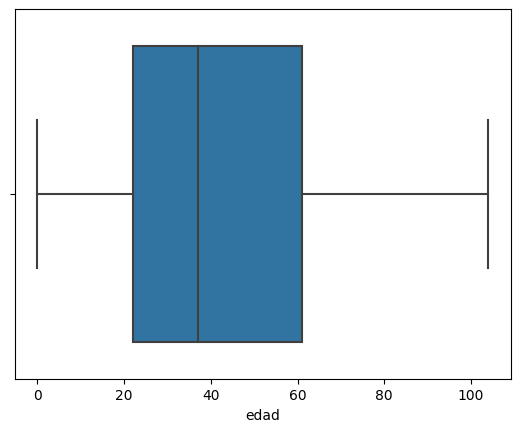

In [ ]:
fig = sns.boxplot(data = df_merged, x = 'edad')

In [ ]:
df_merged[df_merged['edad']==0]

In [ ]:
df_merged['sexo'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df_merged['regimen'].unique()

array(['REGIMEN SUBSIDIADO', 'OTROS', 'VINCULADOS',
       'REGIMEN CONTRIBUTIVO', 'PARTICULARES', 'REGIMEN ESPECIAL',
       'RIESGOS PROFESIONAL.', 'HGM 50% DESCUENTO FUNCIONARIOS'],
      dtype=object)

In [ ]:
df_merged['COMUNA'].value_counts()

BUENOS AIRES                 6654
MANRIQUE                     6553
ROBLEDO                      6224
VILLA HERMOSA                4321
POPULAR                      3946
SAN JAVIER                   3474
BELEN                        3202
ARANJUEZ                     3105
SANTA CRUZ                   2527
DOCE DE OCTUBRE              2405
GUAYABAL                      872
LA CANDELARIA                 868
SAN ANTONIO DE PRADO          489
LAURELES                      390
CASTILLA                      241
LA AMERICA                    232
EL POBLADO                    228
SANTA ELENA                   177
SAN CRISTOBAL                 138
ALTAVISTA                     113
SAN SEBASTIAN DE PALMITAS       1
Name: COMUNA, dtype: int64

# CONSULTAS

In [ ]:
df_merged[df_merged['año']==2022]

,año,periodo_reporte,fecha_atencion,servicio,sexo,codigo_aseguradora,aseguradora,poblacion,Departamento,edad,etapa_vida,regimen,COMUNA,NUMERO,HABITANTES,PARTICION
0,2022,1,2022-01-02,ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Veinte de julio,ANTIOQUIA,2,Primera Infancia,REGIMEN SUBSIDIADO,SAN JAVIER,13.0,171854,6.58
1,2022,1,2022-01-02,ambulatorio,M,20000362.0,"AXA COLPATRIA SEGUROS SA, SOAT",Barrio cristobal,ANTIOQUIA,35,Adultez,OTROS,LA AMERICA,12.0,87849,3.36
2,2022,1,2022-01-02,ambulatorio,M,20000368.0,SEGUROS LA PREVISORA,Playon de los comuneros,ANTIOQUIA,24,Juventud,OTROS,SANTA CRUZ,2.0,120959,4.63
3,2022,1,2022-01-02,ambulatorio,M,20000366.0,SEGUROS DEL ESTADO,Aures no2,ANTIOQUIA,23,Juventud,OTROS,ROBLEDO,7.0,204954,7.84
4,2022,1,2022-01-02,ambulatorio,F,20002569.0,DIRECCION GENERAL DE SANIDAD MI,Buenos aires,ANTIOQUIA,31,Adultez,OTROS,BUENOS AIRES,9.0,171416,6.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29037,2022,4,2022-12-31,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Veinte de julio,ANTIOQUIA,23,Juventud,REGIMEN SUBSIDIADO,SAN JAVIER,13.0,171854,6.58
29038,2022,4,2022-12-31,ambulatorio,M,20001960.0,MEDICINA INTEGRAL S.A.,Veinte de julio,ANTIOQUIA,58,Adultez,OTROS,SAN JAVIER,13.0,171854,6.58
29039,2022,4,2022-12-31,ambulatorio,F,20002687.0,ALIANZA MED - ANT EPS SAS - CON CONTRIBUTIVO I...,Berlin,ANTIOQUIA,24,Juventud,REGIMEN CONTRIBUTIVO,ARANJUEZ,4.0,145325,5.56
29040,2022,4,2022-12-31,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Barrio caycedo,ANTIOQUIA,62,Persona Mayor,REGIMEN SUBSIDIADO,BUENOS AIRES,9.0,171416,6.56


In [ ]:
# 1. ¿Cuántas y en qué comuna se encuentran ubicadas la mayoría de mujeres en rango de edad fertil (periodo reproductivo) atendidas por el hospital general?

df_f_15_50 = df_merged[((df_merged['edad'] >= 15) & (df_merged['edad'] <= 50)) & (df_merged['sexo'] == 'F')]

comuna_mas_comun = df_f_15_50['COMUNA'].mode()[0]

df_f_15_50_oficial=df_f_15_50[df_f_15_50['COMUNA']=='ROBLEDO']
df_f_15_50_oficial

# Respuesta: Se encuentra que la comuna donde se concentran más mujeres en rango de edad fertil es Robledo (comuna 7) con un total de 2708 mujeres

,año,periodo_reporte,fecha_atencion,servicio,sexo,codigo_aseguradora,aseguradora,poblacion,Departamento,edad,etapa_vida,regimen,COMUNA,NUMERO,HABITANTES,PARTICION
9,2022,1,2022-01-02,ambulatorio,F,20003122.0,"DEPTO ANTIOQUIA SSSA, ISS 2000",Robledo,ANTIOQUIA,24,Juventud,VINCULADOS,ROBLEDO,7.0,204954,7.84
10,2022,1,2022-01-02,hospitalizado,F,20002699.0,"ASMET SALUD EPS-S SAS, SUBSIDIADO",Fuente clara,ANTIOQUIA,20,Juventud,REGIMEN SUBSIDIADO,ROBLEDO,7.0,204954,7.84
33,2022,1,2022-01-03,hospitalizado,F,20002687.0,ALIANZA MED - ANT EPS SAS - CON CONTRIBUTIVO I...,Robledo,ANTIOQUIA,26,Juventud,REGIMEN CONTRIBUTIVO,ROBLEDO,7.0,204954,7.84
40,2022,1,2022-01-03,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Nueva villa de la iguana,ANTIOQUIA,33,Adultez,REGIMEN SUBSIDIADO,ROBLEDO,7.0,204954,7.84
50,2022,1,2022-01-03,hospitalizado,F,20002687.0,ALIANZA MED - ANT EPS SAS - CON CONTRIBUTIVO I...,Olaya herrera,ANTIOQUIA,16,Adolescencia,REGIMEN CONTRIBUTIVO,ROBLEDO,7.0,204954,7.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45321,2023,2,2023-06-20,ambulatorio,F,20003402.0,UNION TEMPORAL RUTA AUTOINMUNES UTA,El pesebre,ANTIOQUIA,46,Adultez,REGIMEN ESPECIAL,ROBLEDO,7.0,204954,7.84
45398,2023,2,2023-06-13,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Aures no.1,ANTIOQUIA,49,Adultez,REGIMEN SUBSIDIADO,ROBLEDO,7.0,204954,7.84
45490,2023,2,2023-06-06,ambulatorio,F,20003372.0,"DISPENSARIO MEDICO MEDELLIN, SANIDAD MILITAR",Cordoba,ANTIOQUIA,46,Adultez,REGIMEN ESPECIAL,ROBLEDO,7.0,204954,7.84
45554,2023,2,2023-06-02,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Robledo,ANTIOQUIA,48,Adultez,REGIMEN SUBSIDIADO,ROBLEDO,7.0,204954,7.84


In [ ]:
df_f_15_50['COMUNA'].value_counts()

ROBLEDO                 2708
MANRIQUE                2399
BUENOS AIRES            2099
POPULAR                 1681
VILLA HERMOSA           1581
SAN JAVIER              1378
ARANJUEZ                1243
BELEN                   1115
SANTA CRUZ              1018
DOCE DE OCTUBRE          956
LA CANDELARIA            361
GUAYABAL                 200
SAN ANTONIO DE PRADO     195
LAURELES                 156
CASTILLA                  96
LA AMERICA                77
SAN CRISTOBAL             49
SANTA ELENA               49
EL POBLADO                48
ALTAVISTA                 41
Name: COMUNA, dtype: int64

In [ ]:
df_f_15_50['edad'].describe()

count    17450.000000
mean        29.667908
std          9.364556
min         15.000000
25%         22.000000
50%         28.000000
75%         36.000000
max         50.000000
Name: edad, dtype: float64

In [ ]:
comuna_mas_comun = df_f_15_50['COMUNA'].mode()[0]
comuna_mas_comun

'ROBLEDO'

In [ ]:
# 2. ¿Qué porcentaje de la población atendida corresponde a infantes y adolescentes?¿y qué comportamiento posee el servicio prestado en el mes de diciembre?

df_in_ad_dic = df_merged[(df_merged['edad'] >= 0) & (df_merged['edad'] <= 18)&(df_merged['fecha_atencion']>=pd.to_datetime('2022-12-01'))&(df_merged['fecha_atencion']<=pd.to_datetime('2022-12-31'))]
df_in_ad_dic

# Respuesta: del total de pacientes atendidos, aproximadamente un 19% corresponde a infantes y adolescentes
# Teniendo en cuenta que de los pacientes infantes y adolescentes el 64,3% corresponde a servicio ambulatorio y el 35,7% restante corresponde a hospitalización, en el caso
# de los infantes y adolescentes en diciembre se mantiene una proporción similar con 68,7% para ambulatorio y 31,3% para hospitalizacion

<ipython-input-94-66d44d30bc0f>:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df_in_ad_dic = df_merged[(df_merged['edad'] >= 0) & (df_merged['edad'] <= 18)&(df_merged['fecha_atencion']>=pd.to_datetime('2022-12-01'))&(df_merged['fecha_atencion']<=pd.to_datetime('2022-12-31'))]


,año,periodo_reporte,fecha_atencion,servicio,sexo,codigo_aseguradora,aseguradora,poblacion,Departamento,edad,etapa_vida,regimen,COMUNA,NUMERO,HABITANTES,PARTICION
26426,2022,4,2022-12-01,ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Bello horizonte,ANTIOQUIA,0,Primera Infancia,REGIMEN SUBSIDIADO,ROBLEDO,7.0,204954,7.84
26430,2022,4,2022-12-01,hospitalizado,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Enciso,ANTIOQUIA,9,Infancia,REGIMEN SUBSIDIADO,VILLA HERMOSA,8.0,168399,6.44
26442,2022,4,2022-12-01,hospitalizado,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Fatima,ANTIOQUIA,16,Adolescencia,REGIMEN SUBSIDIADO,BELEN,16.0,214967,8.23
26456,2022,4,2022-12-01,hospitalizado,F,20003122.0,"DEPTO ANTIOQUIA SSSA, ISS 2000",San diego,ANTIOQUIA,15,Adolescencia,VINCULADOS,LA CANDELARIA,10.0,78937,3.02
26483,2022,4,2022-12-01,ambulatorio,F,20000271.0,ESE HOSPITAL GENERAL DE MEDELLI DESCUENTOS DEL...,Manrique central no2,ANTIOQUIA,5,Primera Infancia,VINCULADOS,MANRIQUE,3.0,177232,6.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29020,2022,4,2022-12-30,ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Villa hermosa,ANTIOQUIA,0,Primera Infancia,REGIMEN SUBSIDIADO,VILLA HERMOSA,8.0,168399,6.44
29024,2022,4,2022-12-30,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Santo domingo savio no1,ANTIOQUIA,0,Primera Infancia,REGIMEN SUBSIDIADO,POPULAR,1.0,147382,5.64
29026,2022,4,2022-12-30,ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Manrique central no2,ANTIOQUIA,0,Primera Infancia,REGIMEN SUBSIDIADO,MANRIQUE,3.0,177232,6.78
29030,2022,4,2022-12-31,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Buenos aires,ANTIOQUIA,11,Infancia,REGIMEN SUBSIDIADO,BUENOS AIRES,9.0,171416,6.56


In [ ]:
# Proproción de infantes y adolescentes de la población total atendida
df_in_ad = df_merged[(df_merged['edad'] >= 0) & (df_merged['edad'] <= 18)]
df_in_ad

,año,periodo_reporte,fecha_atencion,servicio,sexo,codigo_aseguradora,aseguradora,poblacion,Departamento,edad,etapa_vida,regimen,COMUNA,NUMERO,HABITANTES,PARTICION
0,2022,1,2022-01-02,ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Veinte de julio,ANTIOQUIA,2,Primera Infancia,REGIMEN SUBSIDIADO,SAN JAVIER,13.0,171854,6.58
8,2022,1,2022-01-02,ambulatorio,F,20003122.0,"DEPTO ANTIOQUIA SSSA, ISS 2000",Manrique oriental,ANTIOQUIA,17,Adolescencia,VINCULADOS,MANRIQUE,3.0,177232,6.78
19,2022,1,2022-01-03,ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,El rincon,ANTIOQUIA,0,Primera Infancia,REGIMEN SUBSIDIADO,BELEN,16.0,214967,8.23
20,2022,1,2022-01-03,ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Robledo,ANTIOQUIA,1,Primera Infancia,REGIMEN SUBSIDIADO,ROBLEDO,7.0,204954,7.84
21,2022,1,2022-01-03,ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Guayabal,ANTIOQUIA,3,Primera Infancia,REGIMEN SUBSIDIADO,GUAYABAL,15.0,64856,2.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44850,2023,2,2023-06-01,ambulatorio,F,20000271.0,ESE HOSPITAL GENERAL DE MEDELLI DESCUENTO A EM...,Manrique central no.2,ANTIOQUIA,18,Adolescencia,VINCULADOS,MANRIQUE,3.0,177232,6.78
44853,2023,2,2023-06-01,hospitalizado,F,20002673.0,ADRES,Trece de noviembre,ANTIOQUIA,16,Adolescencia,OTROS,VILLA HERMOSA,8.0,168399,6.44
44863,2023,2,2023-06-01,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,El pesebre,ANTIOQUIA,18,Adolescencia,REGIMEN SUBSIDIADO,SAN JAVIER,13.0,171854,6.58
44868,2023,2,2023-06-01,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Oriente,ANTIOQUIA,17,Adolescencia,REGIMEN SUBSIDIADO,MANRIQUE,3.0,177232,6.78


In [ ]:
8662/46160

0.18765164644714039

In [ ]:
# En general (infantes y adolescentes)
df_in_ad['servicio'].value_counts()

ambulatorio      5566
hospitalizado    3096
Name: servicio, dtype: int64

In [ ]:
x=5566/(5566+3096)
y=3096/(5566+3096)
x,y

(0.6425767721080582, 0.3574232278919418)

In [ ]:
# En diciembre
df_in_ad_dic['servicio'].value_counts()

ambulatorio      301
hospitalizado    137
Name: servicio, dtype: int64

In [ ]:
x1=301/438
y1=137/438
x1,y1

(0.6872146118721462, 0.3127853881278539)

In [ ]:
# 3. ¿Cuántos pacientes aporta cada comuna por servicio prestado por el Hospital General?

# servicio ambulatorio
df_amb = df_merged[df_merged['servicio'] == 'ambulatorio']

pacientes_por_comuna_amb = df_amb.groupby('COMUNA')['servicio'].count()

# servicio hospitalizacion
df_hosp = df_merged[df_merged['servicio'] == 'hospitalizado']

pacientes_por_comuna_hosp = df_hosp.groupby('COMUNA')['servicio'].count()

# Ordenar los resultados de pacientes por comuna de ambulatorio de mayor a menor
pacientes_por_comuna_amb = pacientes_por_comuna_amb.sort_values(ascending=False)

# Ordenar los resultados de pacientes por comuna de hospitalización de mayor a menor
pacientes_por_comuna_hosp = pacientes_por_comuna_hosp.sort_values(ascending=False)

pacientes_por_comuna_amb, pacientes_por_comuna_hosp

# Respuesta: En el servicio ambulatorio predomina Manrique, Buenos Aires y Robledo. En el servicio de hospitalización predomina Buenos Aires y Manrique.

(COMUNA
 MANRIQUE                4802
 BUENOS AIRES            4734
 ROBLEDO                 4712
 VILLA HERMOSA           2996
 POPULAR                 2705
 ARANJUEZ                2324
 SAN JAVIER              2322
 BELEN                   2301
 SANTA CRUZ              1852
 DOCE DE OCTUBRE         1774
 GUAYABAL                 674
 LA CANDELARIA            605
 SAN ANTONIO DE PRADO     361
 LAURELES                 310
 EL POBLADO               189
 CASTILLA                 186
 LA AMERICA               181
 SANTA ELENA              132
 SAN CRISTOBAL             84
 ALTAVISTA                 78
 Name: servicio, dtype: int64,
 COMUNA
 BUENOS AIRES                 1920
 MANRIQUE                     1751
 ROBLEDO                      1512
 VILLA HERMOSA                1325
 POPULAR                      1241
 SAN JAVIER                   1152
 BELEN                         901
 ARANJUEZ                      781
 SANTA CRUZ                    675
 DOCE DE OCTUBRE               631
 LA

In [ ]:
# 4. ¿Cuál es el tipo de servicio más demandado durante los 4 periodos del año en el Hospital General?

# Filtrado por períodos
df_1 = df_merged[df_merged['periodo_reporte'] == 1]
df_2 = df_merged[df_merged['periodo_reporte'] == 2]
df_3 = df_merged[df_merged['periodo_reporte'] == 3]
df_4 = df_merged[df_merged['periodo_reporte'] == 4]

# Groupby por tipo de servicio
servicio_1 = df_1.groupby('servicio')['periodo_reporte'].count()
servicio_2 = df_2.groupby('servicio')['periodo_reporte'].count()
servicio_3 = df_3.groupby('servicio')['periodo_reporte'].count()
servicio_4 = df_4.groupby('servicio')['periodo_reporte'].count()

servicio_1,servicio_2,servicio_3,servicio_4

# Respuesta: Predomina el servicio ambulatorio en los 4 períodos de reporte

(servicio
 ambulatorio      9661
 hospitalizado    4376
 Name: periodo_reporte, dtype: int64,
 servicio
 ambulatorio      11941
 hospitalizado     4733
 Name: periodo_reporte, dtype: int64,
 servicio
 ambulatorio      6163
 hospitalizado    2146
 Name: periodo_reporte, dtype: int64,
 servicio
 ambulatorio      5557
 hospitalizado    1583
 Name: periodo_reporte, dtype: int64)

In [ ]:
# 5. ¿A qué regimen pertenecen la mayoría de personas mayores atendidas por el Hospital General?

df_reg= df_merged[df_merged['etapa_vida'] == 'Persona Mayor']
df_reg
df_reg['regimen'].value_counts()

# Respuesta: Las personas mayores (edad superior a 65 años) pertenecen en su mayoría al regimen subsidiado

REGIMEN SUBSIDIADO      8442
OTROS                   2163
REGIMEN ESPECIAL        1257
REGIMEN CONTRIBUTIVO     420
VINCULADOS               234
PARTICULARES             190
RIESGOS PROFESIONAL.       7
Name: regimen, dtype: int64

In [ ]:
8442/12713

0.6640446786753716

# DATAFRAME FINAL

In [53]:
df_merged

,año,periodo_reporte,fecha_atencion,servicio,sexo,codigo_aseguradora,aseguradora,poblacion,Departamento,edad,etapa_vida,regimen,COMUNA,NUMERO,HABITANTES,PARTICION
0,2022,1,2022-01-02,ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Veinte de julio,ANTIOQUIA,2,Primera Infancia,REGIMEN SUBSIDIADO,SAN JAVIER,13.0,171854,6.58
1,2022,1,2022-01-02,ambulatorio,M,20000362.0,"AXA COLPATRIA SEGUROS SA, SOAT",Barrio cristobal,ANTIOQUIA,35,Adultez,OTROS,LA AMERICA,12.0,87849,3.36
2,2022,1,2022-01-02,ambulatorio,M,20000368.0,SEGUROS LA PREVISORA,Playon de los comuneros,ANTIOQUIA,24,Juventud,OTROS,SANTA CRUZ,2.0,120959,4.63
3,2022,1,2022-01-02,ambulatorio,M,20000366.0,SEGUROS DEL ESTADO,Aures no2,ANTIOQUIA,23,Juventud,OTROS,ROBLEDO,7.0,204954,7.84
4,2022,1,2022-01-02,ambulatorio,F,20002569.0,DIRECCION GENERAL DE SANIDAD MI,Buenos aires,ANTIOQUIA,31,Adultez,OTROS,BUENOS AIRES,9.0,171416,6.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51773,2023,2,2023-06-02,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,san antonio de prado,ANTIOQUIA,70,Persona Mayor,REGIMEN SUBSIDIADO,SAN ANTONIO DE PRADO,80.0,112336,4.30
51774,2023,2,2023-06-01,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Guayabal,ANTIOQUIA,95,Persona Mayor,REGIMEN SUBSIDIADO,GUAYABAL,15.0,64856,2.48
51775,2023,2,2023-06-01,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Santo domingo savio no.1,ANTIOQUIA,68,Persona Mayor,REGIMEN SUBSIDIADO,POPULAR,1.0,147382,5.64
51776,2023,2,2023-06-01,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,El pesebre,ANTIOQUIA,69,Persona Mayor,REGIMEN SUBSIDIADO,SAN JAVIER,13.0,171854,6.58


In [ ]:
nombre_archivo = 'dataHospComunas.xlsx'
df_merged.to_excel(nombre_archivo, index=False)

In [ ]:
df_oficial=df_merged.copy()
df_oficial

In [27]:
df_oficial['COMUNA'].unique()

array(['SAN JAVIER', 'LA AMERICA', 'SANTA CRUZ', 'ROBLEDO',
       'BUENOS AIRES', 'MANRIQUE', 'POPULAR', 'BELEN', 'VILLA HERMOSA',
       'LAURELES', 'GUAYABAL', 'ARANJUEZ', 'DOCE DE OCTUBRE',
       'LA CANDELARIA', 'EL POBLADO', 'CASTILLA', 'SAN ANTONIO DE PRADO',
       'SAN CRISTOBAL', 'SANTA ELENA', 'ALTAVISTA',
       'SAN SEBASTIAN DE PALMITAS'], dtype=object)

In [55]:
# Agregar columnas 'LATITUD' y 'LONGITUD'
df_oficial['LONGITUD'] = None
df_oficial['LATITUD'] = None

# Coordenadas de las comunas
coordenadas = {
    'SAN JAVIER': {'LONGITUD': -75.6139845, 'LATITUD': 6.2569763},
    'LA AMERICA': {'LONGITUD': -75.604783, 'LATITUD': 6.2506533},
    'SANTA CRUZ': {'LONGITUD': -75.5590081, 'LATITUD': 6.2933521},
    'ROBLEDO': {'LONGITUD': -75.5974389, 'LATITUD': 6.2755},
    'BUENOS AIRES': {'LONGITUD': -75.5562616, 'LATITUD': 6.2409031},
    'MANRIQUE': {'LONGITUD': -75.5540522753592, 'LATITUD': 6.2732351},
    'POPULAR': {'LONGITUD': -75.5476141, 'LATITUD': 6.2999426},
    'BELEN': {'LONGITUD': -75.6035328, 'LATITUD': 6.2101862},
    'VILLA HERMOSA': {'LONGITUD': -75.5517139, 'LATITUD': 6.2589671},
    'LAURELES': {'LONGITUD': -75.5958328, 'LATITUD': 6.2419995},
    'GUAYABAL': {'LONGITUD': -75.5860854, 'LATITUD': 6.2003647},
    'ARANJUEZ': {'LONGITUD': -75.5655199, 'LATITUD': 6.2805129},
    'DOCE DE OCTUBRE': {'LONGITUD': -75.5764522309351, 'LATITUD': 6.30382045},
    'LA CANDELARIA': {'LONGITUD': -75.5667115, 'LATITUD': 6.2505337},
    'EL POBLADO': {'LONGITUD': -75.569522, 'LATITUD': 6.210360},
    'CASTILLA': {'LONGITUD': -75.573642, 'LATITUD': 6.290686},
    'SAN ANTONIO DE PRADO': {'LONGITUD': -75.654108, 'LATITUD': 6.183415},
    'SAN CRISTOBAL': {'LONGITUD': -75.6374854, 'LATITUD': 6.2782896},
    'SANTA ELENA': {'LONGITUD': -75.4981431099913, 'LATITUD': 6.20994085},
    'ALTAVISTA': {'LONGITUD': -75.6354553511697, 'LATITUD': 6.2274461},
    'SAN SEBASTIAN DE PALMITAS': {'LONGITUD': -75.691568, 'LATITUD': 6.344432},
}

# Ciclo para iterar sobre el df y reemplazar el valor de la longitud y latitud
for index, row in df_oficial.iterrows():
    comuna = row['COMUNA']
    if comuna in coordenadas:
        df_oficial.at[index, 'LONGITUD'] = coordenadas[comuna]['LONGITUD']
        df_oficial.at[index, 'LATITUD'] = coordenadas[comuna]['LATITUD']

df_oficial

,año,periodo_reporte,fecha_atencion,servicio,sexo,codigo_aseguradora,aseguradora,poblacion,Departamento,edad,etapa_vida,regimen,COMUNA,NUMERO,HABITANTES,PARTICION,LONGITUD,LATITUD
0,2022,1,2022-01-02,ambulatorio,M,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Veinte de julio,ANTIOQUIA,2,Primera Infancia,REGIMEN SUBSIDIADO,SAN JAVIER,13.0,171854,6.58,-75.613985,6.256976
1,2022,1,2022-01-02,ambulatorio,M,20000362.0,"AXA COLPATRIA SEGUROS SA, SOAT",Barrio cristobal,ANTIOQUIA,35,Adultez,OTROS,LA AMERICA,12.0,87849,3.36,-75.604783,6.250653
2,2022,1,2022-01-02,ambulatorio,M,20000368.0,SEGUROS LA PREVISORA,Playon de los comuneros,ANTIOQUIA,24,Juventud,OTROS,SANTA CRUZ,2.0,120959,4.63,-75.559008,6.293352
3,2022,1,2022-01-02,ambulatorio,M,20000366.0,SEGUROS DEL ESTADO,Aures no2,ANTIOQUIA,23,Juventud,OTROS,ROBLEDO,7.0,204954,7.84,-75.597439,6.2755
4,2022,1,2022-01-02,ambulatorio,F,20002569.0,DIRECCION GENERAL DE SANIDAD MI,Buenos aires,ANTIOQUIA,31,Adultez,OTROS,BUENOS AIRES,9.0,171416,6.56,-75.556262,6.240903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51773,2023,2,2023-06-02,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,san antonio de prado,ANTIOQUIA,70,Persona Mayor,REGIMEN SUBSIDIADO,SAN ANTONIO DE PRADO,80.0,112336,4.30,-75.654108,6.183415
51774,2023,2,2023-06-01,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Guayabal,ANTIOQUIA,95,Persona Mayor,REGIMEN SUBSIDIADO,GUAYABAL,15.0,64856,2.48,-75.586085,6.200365
51775,2023,2,2023-06-01,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,Santo domingo savio no.1,ANTIOQUIA,68,Persona Mayor,REGIMEN SUBSIDIADO,POPULAR,1.0,147382,5.64,-75.547614,6.299943
51776,2023,2,2023-06-01,ambulatorio,F,20002686.0,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,El pesebre,ANTIOQUIA,69,Persona Mayor,REGIMEN SUBSIDIADO,SAN JAVIER,13.0,171854,6.58,-75.613985,6.256976


In [56]:
# Nombre de las columnas de mayuscula
df_oficial.columns = df_oficial.columns.str.upper()

# Eliminar columnas adicionales
columnas_a_eliminar = ['CODIGO_ASEGURADORA', 'POBLACION']
df_oficial = df_oficial.drop(columnas_a_eliminar, axis=1)

df_oficial

,AÑO,PERIODO_REPORTE,FECHA_ATENCION,SERVICIO,SEXO,ASEGURADORA,DEPARTAMENTO,EDAD,ETAPA_VIDA,REGIMEN,COMUNA,NUMERO,HABITANTES,PARTICION,LONGITUD,LATITUD
0,2022,1,2022-01-02,ambulatorio,M,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,ANTIOQUIA,2,Primera Infancia,REGIMEN SUBSIDIADO,SAN JAVIER,13.0,171854,6.58,-75.613985,6.256976
1,2022,1,2022-01-02,ambulatorio,M,"AXA COLPATRIA SEGUROS SA, SOAT",ANTIOQUIA,35,Adultez,OTROS,LA AMERICA,12.0,87849,3.36,-75.604783,6.250653
2,2022,1,2022-01-02,ambulatorio,M,SEGUROS LA PREVISORA,ANTIOQUIA,24,Juventud,OTROS,SANTA CRUZ,2.0,120959,4.63,-75.559008,6.293352
3,2022,1,2022-01-02,ambulatorio,M,SEGUROS DEL ESTADO,ANTIOQUIA,23,Juventud,OTROS,ROBLEDO,7.0,204954,7.84,-75.597439,6.2755
4,2022,1,2022-01-02,ambulatorio,F,DIRECCION GENERAL DE SANIDAD MI,ANTIOQUIA,31,Adultez,OTROS,BUENOS AIRES,9.0,171416,6.56,-75.556262,6.240903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51773,2023,2,2023-06-02,ambulatorio,F,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,ANTIOQUIA,70,Persona Mayor,REGIMEN SUBSIDIADO,SAN ANTONIO DE PRADO,80.0,112336,4.30,-75.654108,6.183415
51774,2023,2,2023-06-01,ambulatorio,F,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,ANTIOQUIA,95,Persona Mayor,REGIMEN SUBSIDIADO,GUAYABAL,15.0,64856,2.48,-75.586085,6.200365
51775,2023,2,2023-06-01,ambulatorio,F,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,ANTIOQUIA,68,Persona Mayor,REGIMEN SUBSIDIADO,POPULAR,1.0,147382,5.64,-75.547614,6.299943
51776,2023,2,2023-06-01,ambulatorio,F,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,ANTIOQUIA,69,Persona Mayor,REGIMEN SUBSIDIADO,SAN JAVIER,13.0,171854,6.58,-75.613985,6.256976


In [57]:
df_oficial['ETAPA_VIDA'] = df_oficial['ETAPA_VIDA'].str.upper()
df_oficial['SERVICIO'] = df_oficial['SERVICIO'].str.upper()

df_oficial

,AÑO,PERIODO_REPORTE,FECHA_ATENCION,SERVICIO,SEXO,ASEGURADORA,DEPARTAMENTO,EDAD,ETAPA_VIDA,REGIMEN,COMUNA,NUMERO,HABITANTES,PARTICION,LONGITUD,LATITUD
0,2022,1,2022-01-02,AMBULATORIO,M,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,ANTIOQUIA,2,PRIMERA INFANCIA,REGIMEN SUBSIDIADO,SAN JAVIER,13.0,171854,6.58,-75.613985,6.256976
1,2022,1,2022-01-02,AMBULATORIO,M,"AXA COLPATRIA SEGUROS SA, SOAT",ANTIOQUIA,35,ADULTEZ,OTROS,LA AMERICA,12.0,87849,3.36,-75.604783,6.250653
2,2022,1,2022-01-02,AMBULATORIO,M,SEGUROS LA PREVISORA,ANTIOQUIA,24,JUVENTUD,OTROS,SANTA CRUZ,2.0,120959,4.63,-75.559008,6.293352
3,2022,1,2022-01-02,AMBULATORIO,M,SEGUROS DEL ESTADO,ANTIOQUIA,23,JUVENTUD,OTROS,ROBLEDO,7.0,204954,7.84,-75.597439,6.2755
4,2022,1,2022-01-02,AMBULATORIO,F,DIRECCION GENERAL DE SANIDAD MI,ANTIOQUIA,31,ADULTEZ,OTROS,BUENOS AIRES,9.0,171416,6.56,-75.556262,6.240903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51773,2023,2,2023-06-02,AMBULATORIO,F,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,ANTIOQUIA,70,PERSONA MAYOR,REGIMEN SUBSIDIADO,SAN ANTONIO DE PRADO,80.0,112336,4.30,-75.654108,6.183415
51774,2023,2,2023-06-01,AMBULATORIO,F,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,ANTIOQUIA,95,PERSONA MAYOR,REGIMEN SUBSIDIADO,GUAYABAL,15.0,64856,2.48,-75.586085,6.200365
51775,2023,2,2023-06-01,AMBULATORIO,F,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,ANTIOQUIA,68,PERSONA MAYOR,REGIMEN SUBSIDIADO,POPULAR,1.0,147382,5.64,-75.547614,6.299943
51776,2023,2,2023-06-01,AMBULATORIO,F,ALIANZA MEDELLIN ANTIOQUIA EPS SUBSIDIADO ISS ...,ANTIOQUIA,69,PERSONA MAYOR,REGIMEN SUBSIDIADO,SAN JAVIER,13.0,171854,6.58,-75.613985,6.256976


In [62]:
df_oficial.isnull().sum()

AÑO                0
PERIODO_REPORTE    0
FECHA_ATENCION     0
SERVICIO           0
SEXO               0
ASEGURADORA        0
DEPARTAMENTO       0
EDAD               0
ETAPA_VIDA         0
REGIMEN            0
COMUNA             0
NUMERO             0
HABITANTES         0
PARTICION          0
LONGITUD           0
LATITUD            0
dtype: int64

In [59]:
nombre_archivo = 'DataHospComunasOficial.xlsx'
df_oficial.to_excel(nombre_archivo, index=False)

In [ ]:
import pandas as pd

df_oficial=pd.read_excel('/content/dataHospComunasOficial.xlsx')

In [33]:
df_pacientes=pd.DataFrame()

df_pacientes['COMUNA']=df_oficial['COMUNA'].unique()

count_pacientes=df_oficial['COMUNA'].value_counts()
# pacientes['NuevoIndice'] = range(1, len(pacientes) + 1)

count_pacientes

df_pacientes['PACIENTES']=None

pacientes_comuna = {
    'BUENOS AIRES': {'PACIENTES':6654},
    'MANRIQUE':{'PACIENTES':6553},
    'ROBLEDO':{'PACIENTES':6224},
    'VILLA HERMOSA':{'PACIENTES':4321},
    'POPULAR':{'PACIENTES':3946},
    'SAN JAVIER':{'PACIENTES':3474},
    'BELEN':{'PACIENTES':3202},
    'ARANJUEZ':{'PACIENTES':3105},
    'SANTA CRUZ':{'PACIENTES':2527},
    'DOCE DE OCTUBRE':{'PACIENTES':2405},
    'GUAYABAL':{'PACIENTES':872},
    'LA CANDELARIA':{'PACIENTES':868},
    'SAN ANTONIO DE PRADO':{'PACIENTES':489},
    'LAURELES':{'PACIENTES':390},
    'CASTILLA':{'PACIENTES':241},
    'LA AMERICA':{'PACIENTES':232},
    'EL POBLADO':{'PACIENTES':228},
    'SANTA ELENA':{'PACIENTES':177},
    'SAN CRISTOBAL':{'PACIENTES':138},
    'ALTAVISTA':{'PACIENTES':113},
    'SAN SEBASTIAN DE PALMITAS':{'PACIENTES':1}
}

for index, row in df_pacientes.iterrows():
    pacientes = row['COMUNA']
    if pacientes in pacientes_comuna:
        df_pacientes.at[index, 'PACIENTES'] = pacientes_comuna[pacientes]['PACIENTES']

df_pacientes

,COMUNA,PACIENTES
0,SAN JAVIER,3474
1,LA AMERICA,232
2,SANTA CRUZ,2527
3,ROBLEDO,6224
4,BUENOS AIRES,6654
5,MANRIQUE,6553
6,POPULAR,3946
7,BELEN,3202
8,VILLA HERMOSA,4321
9,LAURELES,390


In [68]:
nombre_archivo = 'DataPacientes.xlsx'
df_pacientes.to_excel(nombre_archivo, index=False)

In [3]:
import pandas as pd
df=pd.read_excel('/content/DataPacientes.xlsx')

In [7]:
df['PORCENTAJE'] = (df['PACIENTES'] / df['PACIENTES'].sum()) * 100

df

,COMUNA,PACIENTES,PORCENTAJE
0,SAN JAVIER,3474,7.525997
1,LA AMERICA,232,0.502600
2,SANTA CRUZ,2527,5.474437
3,ROBLEDO,6224,13.483536
4,BUENOS AIRES,6654,14.415078
5,MANRIQUE,6553,14.196274
6,POPULAR,3946,8.548527
7,BELEN,3202,6.936742
8,VILLA HERMOSA,4321,9.360919
9,LAURELES,390,0.844887


In [8]:
nombre_archivo = 'DataPacientesOficial.xlsx'
df.to_excel(nombre_archivo, index=False)